In [1]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as num
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("Restaurant_Reviews.tsv",sep="\t")
df.sample(5)

,Review,Liked
648,Great food.,1
714,"I loved the grilled pizza, reminded me of legi...",1
250,Owner's are really great people.!,1
81,walked in and the place smelled like an old gr...,0
660,"I personally love the hummus, pita, baklava, f...",1


In [3]:
df.shape

(1000, 2)

In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [5]:
df["Liked"].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

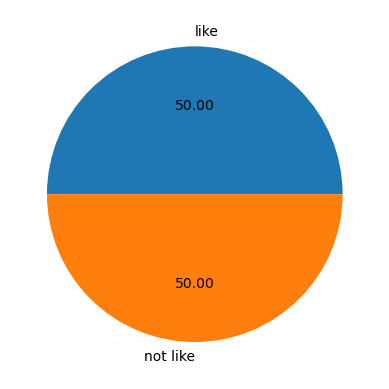

In [6]:
plt.pie(df["Liked"].value_counts(),labels=["like","not like"],autopct="%0.2f")
plt.show()

In [7]:
df["character_count"] = df["Review"].apply(len)

In [8]:
df["word_count"] = df["Review"].apply(lambda x : len(nltk.word_tokenize(x)))

In [9]:
df["sent_count"] = df["Review"].apply(lambda x : len(nltk.sent_tokenize(x)))

In [10]:
df.head()

,Review,Liked,character_count,word_count,sent_count
0,Wow... Loved this place.,1,24,6,2
1,Crust is not good.,0,18,5,1
2,Not tasty and the texture was just nasty.,0,41,9,1
3,Stopped by during the late May bank holiday of...,1,87,16,1
4,The selection on the menu was great and so wer...,1,59,13,1


In [11]:
df[df["Liked"] == 1][["character_count","word_count","sent_count"]].describe()

,character_count,word_count,sent_count
count,500.000000,500.000000,500.000000
mean,55.880000,12.042000,1.050000
std,30.219464,6.282609,0.227163
min,11.000000,3.000000,1.000000
25%,32.750000,7.000000,1.000000
50%,49.500000,11.000000,1.000000
75%,73.250000,16.000000,1.000000
max,148.000000,33.000000,3.000000


In [12]:
df[df["Liked"] == 0][["character_count","word_count","sent_count"]].describe()

,character_count,word_count,sent_count
count,500.000000,500.000000,500.000000
mean,60.750000,13.326000,1.030000
std,34.224935,7.108924,0.170758
min,11.000000,3.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.500000,12.000000,1.000000
75%,84.000000,18.000000,1.000000
max,149.000000,34.000000,2.000000


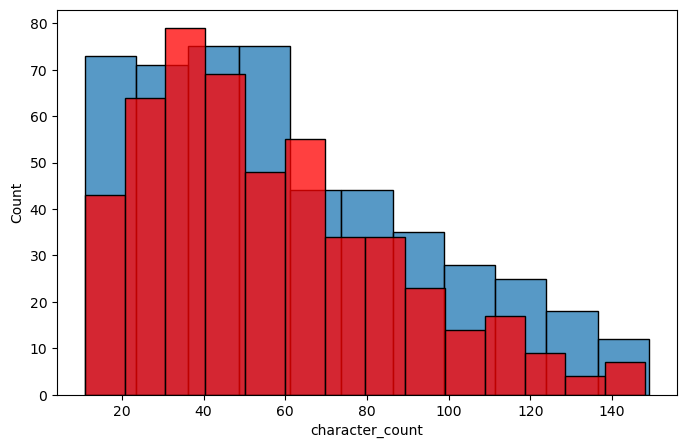

In [13]:
plt.figure(figsize=(8,5))
sea.histplot(df[df["Liked"] == 0]["character_count"])
sea.histplot(df[df["Liked"] == 1]["character_count"],color="red")
plt.show()


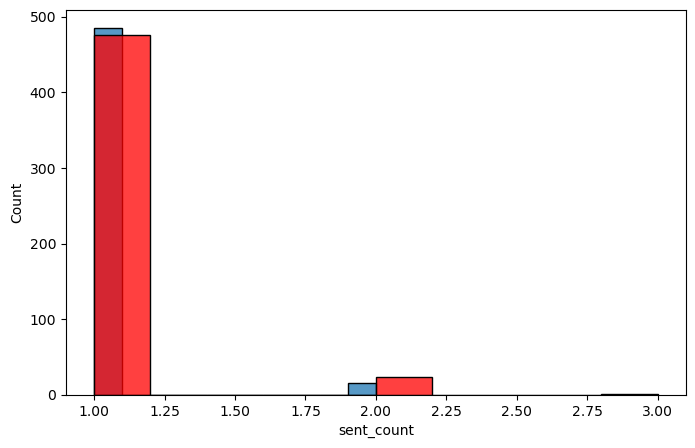

In [14]:
plt.figure(figsize=(8,5))
sea.histplot(df[df["Liked"] == 0]["sent_count"])
sea.histplot(df[df["Liked"] == 1]["sent_count"],color="red")
plt.show()

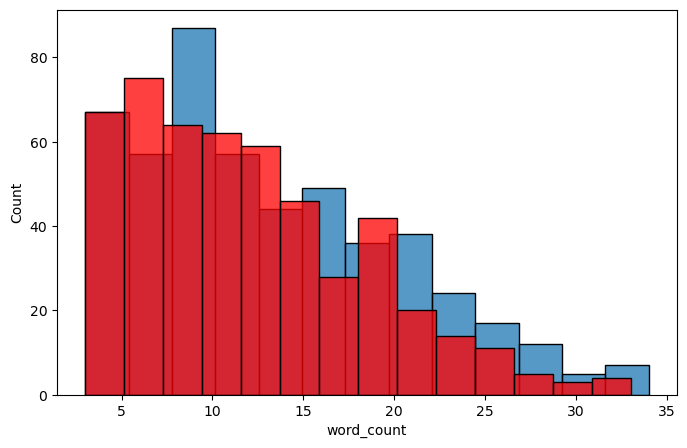

In [15]:
plt.figure(figsize=(8,5))
sea.histplot(df[df["Liked"] == 0]["word_count"])
sea.histplot(df[df["Liked"] == 1]["word_count"],color="red")
plt.show()

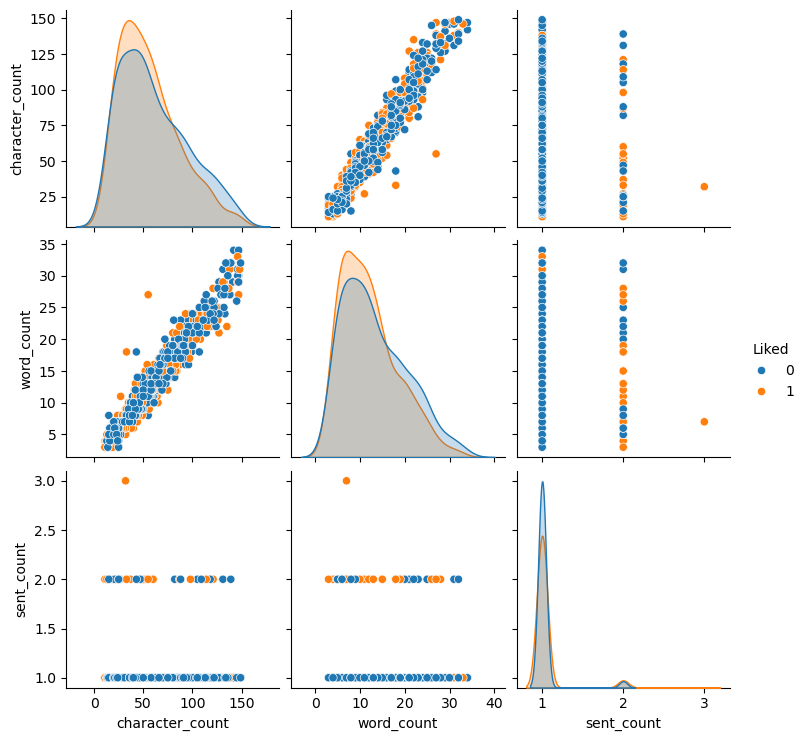

In [16]:
sea.pairplot(df,hue="Liked")

<Axes: >

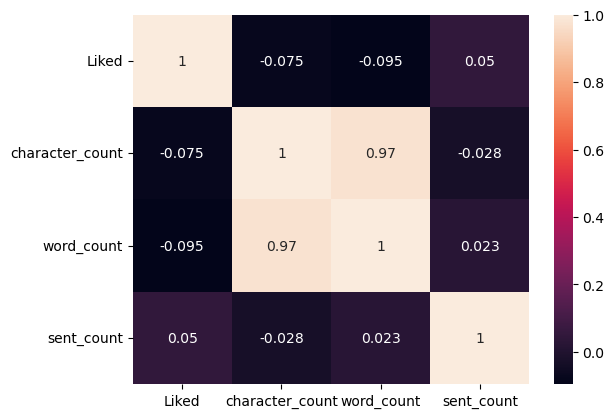

In [17]:
df_num = df.select_dtypes(include=["number"])
sea.heatmap(df_num.corr(),annot=True)

In [18]:
import re

In [19]:
df["Review"][0]

'Wow... Loved this place.'

In [20]:
review = re.sub("[^a-zA-Z]"," ",df["Review"][0])

In [21]:
review

'Wow    Loved this place '

In [22]:
review = nltk.word_tokenize(review)

In [23]:
review

['Wow', 'Loved', 'this', 'place']

In [24]:
review = [word for word in review if word not in set(stopwords.words("english"))]

In [25]:
review

['Wow', 'Loved', 'place']

In [26]:
custom_stopwords = {
    'don', "don't", 'ain', "aren", "aren't", 'couldn', "couldn't", "didn",
    "didn't", "doesn", "doesn't", 'hadn', "hadn't", "hasn", "hasn't", 'haven',
    "haven't", 'isn', "isn't", 'ma', "mightn", "mightn't", 'mustn', "mustn't",
    "needn", "needn't", "shan", "shan't", 'no', "nor", 'not', "shouldn", 
    "shouldn't", "wasn", "wasn't", "weren", "weren't", 'won', "won't", "wouldn", "wouldn't"
}
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
stop_word = set(stopwords.words("english")) - custom_stopwords


In [27]:
def clean_text(text):
    text = text.lower()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = nltk.word_tokenize(text)
    text = [lemma.lemmatize(word,pos="v") for word in text if word not in stop_word]
    text = " ".join(text)
    return text

In [28]:
df["clean_text"] = df["Review"].apply(clean_text)

In [29]:
df.head()

,Review,Liked,character_count,word_count,sent_count,clean_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust not good
2,Not tasty and the texture was just nasty.,0,41,9,1,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,selection menu great price


In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")
pos = wc.generate(df[df["Liked"] == 1]["clean_text"].str.cat(sep=" "))

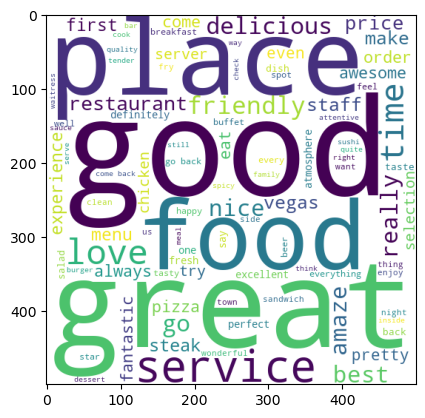

In [31]:
plt.imshow(pos)

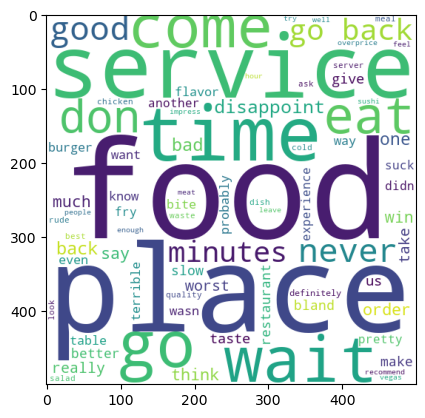

In [32]:
neg = wc.generate(df[df["Liked"] == 0]["clean_text"].str.cat(sep=" "))
plt.imshow(neg)

In [33]:
listt = []
for msg in df[df["Liked"] == 1]["clean_text"].tolist():
    for i in msg.split():
        listt.append(i)

In [34]:
len(listt)

2721

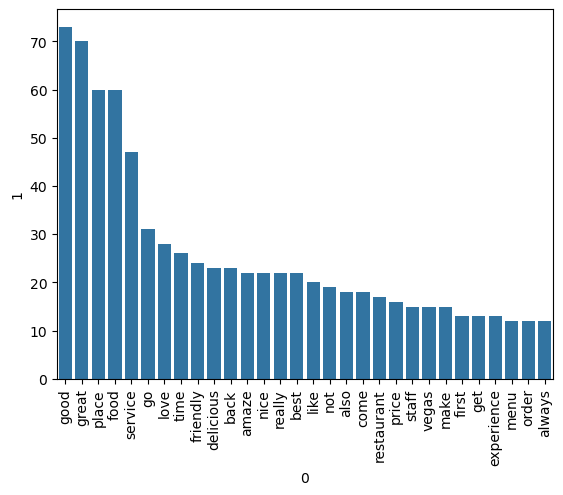

In [35]:
from collections import Counter
sea.barplot(x =pd.DataFrame(Counter(listt).most_common(30))[0],y=pd.DataFrame(Counter(listt).most_common(30))[1],data=df)
plt.xticks(rotation="vertical")
plt.show()

In [36]:
lisst = []
for msg in df[df["Liked"] == 0]["clean_text"].tolist():
   for i in msg.split():
       lisst.append(i)

In [39]:
len(lisst)

2992

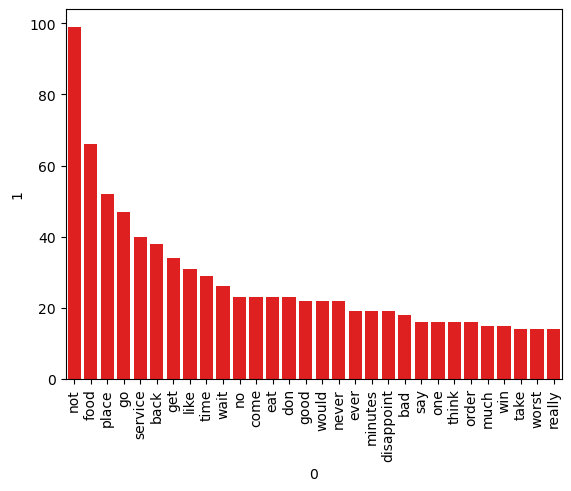

In [46]:
sea.barplot(x = pd.DataFrame(Counter(lisst).most_common(30))[0], y = pd.DataFrame(Counter(lisst).most_common(30))[1], data = df, color = "red")
plt.xticks(rotation = "vertical")
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer(max_features=1500)
tfidf = TfidfVectorizer()
x = cv.fit_transform(df["clean_text"]).toarray()

In [48]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
y = df["Liked"]

In [50]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [51]:
xtrain, xtest, ytrain, ytest  = train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score

In [53]:
svm = SVC(kernel="sigmoid",gamma=1.0)
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=2)
lg = LogisticRegression()
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [54]:
all_model = {
    "SVM" : svm,
    "GaussianNB" : gnb,
    "MultinomialNB" : mnb,
    "BernoulliNB" : bnb,
    "DecisionTree" : dt,
    "Randomforest" : rf,
   "logisticregression" : lg,
    "XGB" : xgb
}

In [55]:
def modeling(models,xtrain,xtest,ytrain,ytest):
    models.fit(xtrain,ytrain)
    ypredict = models.predict(xtest)
    accuracy = accuracy_score(ytest,ypredict)
    precision = precision_score(ytest,ypredict)
    return accuracy, precision

In [56]:
accuracy = []
precision = []

for name, model in all_model.items():
    accu, pres = modeling(model,xtrain,xtest,ytrain,ytest)
    print(f"{name} accuracy {accu} precision {pres} \n")
    accuracy.append(accu)
    precision.append(pres)

SVM accuracy 0.735 precision 0.7052631578947368 

GaussianNB accuracy 0.69 precision 0.6119402985074627 

MultinomialNB accuracy 0.825 precision 0.7938144329896907 

BernoulliNB accuracy 0.83 precision 0.7788461538461539 

DecisionTree accuracy 0.715 precision 0.972972972972973 

Randomforest accuracy 0.845 precision 0.8505747126436781 

logisticregression accuracy 0.86 precision 0.826530612244898 

XGB accuracy 0.82 precision 0.8255813953488372 



In [57]:
sec_df = pd.DataFrame({"Algorithm" : all_model.keys(),"Accuracy" : accuracy, "precision" : precision}).sort_values("precision",ascending=False)

In [58]:
sec_df

,Algorithm,Accuracy,precision
4,DecisionTree,0.715,0.972973
5,Randomforest,0.845,0.850575
6,logisticregression,0.860,0.826531
7,XGB,0.820,0.825581
2,MultinomialNB,0.825,0.793814
3,BernoulliNB,0.830,0.778846
0,SVM,0.735,0.705263
1,GaussianNB,0.690,0.611940


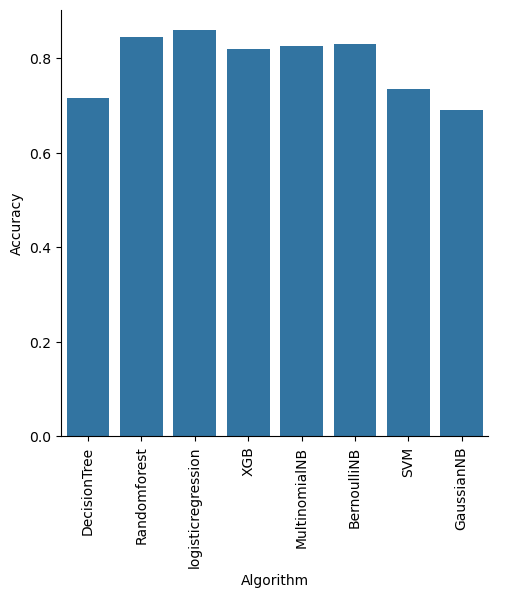

In [65]:
sea.catplot(x = "Algorithm", y="Accuracy",data=sec_df,kind="bar",height=5)
plt.xticks(rotation = "vertical")
plt.show()

In [59]:
# import pickle
# pickle.dump(dt,open("model1.pkl","wb"))
# pickle.dump(rf,open("model2.pkl","wb"))
# pickle.dump(cv,open("vector.pkl","wb"))


In [60]:
text = "i not like this vegitable"

clean_msg = clean_text(text)

In [61]:
fited_msg = cv.transform([clean_msg]).toarray()

In [62]:
rsult = dt.predict(fited_msg)[0]

if rsult == 1:
    print("positive")

else:
    print("negitive")

negitive
